## Logistic Regression Gradient Descent Algorithm

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

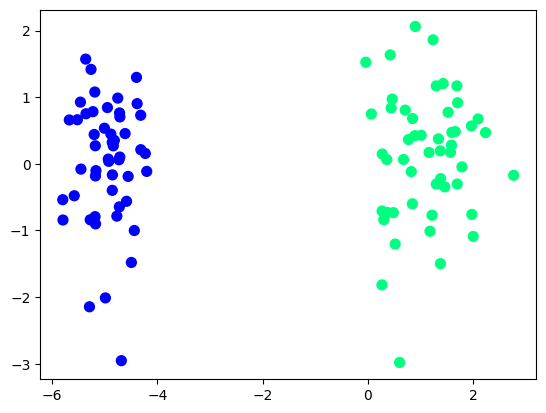

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=50)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def logreg(X,y):
    X = np.insert(X,0,1,axis=1)
    W = np.ones(X.shape[1])
    epochs = 5000
    lr = 0.5
    
    for i in range(epochs):
        y_hat = sigmoid(np.dot(X,W))
        W = W + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return W[0],W[1:]

In [6]:
intercept_,coef_ = logreg(X,y)

In [7]:
print('intercept :',intercept_)
print('coefficients :',coef_)

intercept : 5.102916648814875
coefficients : [3.47974267 0.13305072]


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_in = np.linspace(-3,3,100)
y_in = m*x_in + b

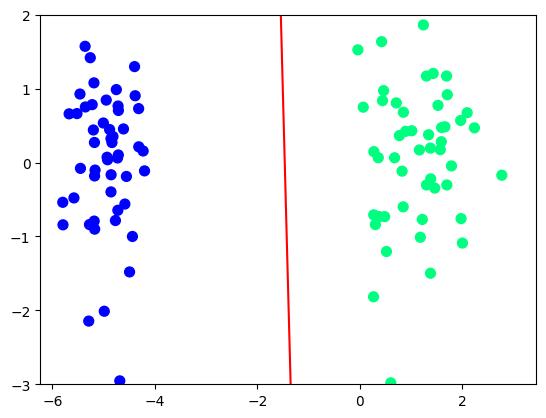

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=50)
plt.plot(x_in,y_in,color = 'red')
plt.ylim(-3,2)
plt.show()

## Comparing it with Sklearn Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logr = LogisticRegression(penalty=None)
logr.fit(X,y)

LogisticRegression(penalty=None)

In [13]:
coeff = logr.coef_
inter = logr.intercept_

In [14]:
coeff

array([[4.2408842 , 0.18227295]])

In [15]:
m = -(coeff[0][0]/coeff[0][1])
b = -(inter/coeff[0][1])

In [16]:
x_inp = np.linspace(-3,3,100)
y_inp = m*x_in + b

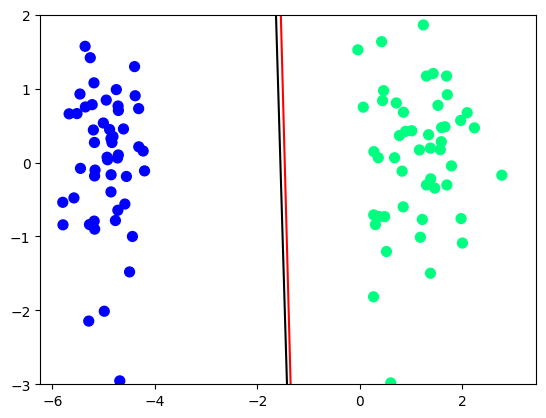

In [17]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=50)
plt.plot(x_in,y_in,color = 'red')
plt.plot(x_inp,y_inp,color='black')
plt.ylim(-3,2)
plt.show()

#### The above plot shows that the best fit line on both the model almost overlaps. The diffrence can be due to slight optemizations in Sklearn Logistic regression model.